<a href="https://colab.research.google.com/github/dmunozbe/TFM_DataScience/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering**

Clustering se refiere a las técnicas para encontrar subgrupos o clusters en conjunto de datos. Cuando se hace un cluster se buscan particiones en las que las observaciones sean similares entre sí.

El clustering busca encontrar subgrupos homogéneos en las observaciones.

Para realizar las agrupaciones utilizamos las distancias o similitudes entre los vectores de atributos
 asociados a distintos registro

In [22]:
#Instalamos el paquete umap-learn
!pip install umap-learn

In [23]:
# Cargamos las librerias necesarias
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import scale
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import umap

import random

import tqdm

import pandas as pd
import sklearn
from sklearn import cluster        # Algoritmos de clustering.
from sklearn import datasets       # Crear datasets.
from sklearn import decomposition  # Algoritmos de reduccion de dimensionalidad.

# Visualizacion.
import plotly.graph_objects as go
import plotly.express as px

%matplotlib inline

In [24]:
# Cargar datos
data = pd.read_csv('/content/drive/MyDrive/UOC/TFM/Datasets definitivos/Final.csv')
data.head()

,Any,Trimestre,Mes,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Compraventa_Total,Compraventa_Unitario,ParadosReg,...,Internet,Movil,Index_Turisme,Index_Motos,Index_Ciclomotors,Index_Furgonetes,Index_Camions,Index_Resta,Zona Verde (m²),m² por habitante
0,2014,1,1,1,Ciutat Vella,1,el Raval,142.8,2813.0,4588,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,628919.0,6.2
1,2014,1,2,1,Ciutat Vella,1,el Raval,142.8,2813.0,4539,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,628919.0,6.2
2,2014,1,3,1,Ciutat Vella,1,el Raval,142.8,2813.0,4572,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,628919.0,6.2
3,2014,2,4,1,Ciutat Vella,1,el Raval,195.2,2948.8,4510,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,628919.0,6.2
4,2014,2,5,1,Ciutat Vella,1,el Raval,195.2,2948.8,4379,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,628919.0,6.2


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8541 entries, 0 to 8540
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Any                         8541 non-null   int64  
 1   Trimestre                   8541 non-null   int64  
 2   Mes                         8541 non-null   int64  
 3   Codi_Districte              8541 non-null   int64  
 4   Nom_Districte               8541 non-null   object 
 5   Codi_Barri                  8541 non-null   int64  
 6   Nom_Barri                   8541 non-null   object 
 7   Compraventa_Total           8541 non-null   float64
 8   Compraventa_Unitario        8541 non-null   float64
 9   ParadosReg                  8541 non-null   int64  
 10  NoParados                   8541 non-null   float64
 11  Sin_Estudios                5628 non-null   float64
 12  Solo_Estudios_Obligatorios  5628 non-null   float64
 13  Bachillerato                5628 

El dataset consta de los siguientes campos:

*   Any
*   Trimestre
*   Mes
*   Codi_Districte
*   Nom_Districte
*   Codi_Barri
*   Nom_Barri
*   Compraventa_Total
*   Compraventa_Unitario
*   ParadosReg
*   NoParados
*   Sin_estudios
*   Solo_Estudios_Obligatorios
*   Bachillerato
*   Estudios_universitarios
*   Estudios_Obligatorios
*   ConsumIndustrial
*   ConsumResidencial
*   ConsumServeis
*   Pm25
*   Pm10
*   Participacion
*   AñosEspVida
*   Internet
*   Movil
*   Index_Turisme
*   Index_Motors
*   Index_Ciclomotors
*   Index_Furgonetes
*   Index_Camions
*   Index_Resta
*   Zona Verde (m²)
*   m² por habitante

## Preparación del dato

Vamos a quedarnos unicamente con las filas que contienen informados todos los indicadores.

In [26]:
# Contar las filas sin NaN
filas_sin_na = data.dropna()
cantidad_filas_sin_na = len(filas_sin_na)
cantidad_filas_sin_na

708

Las filas que contienen todos los indicadores informados son 708 de las 8540 filas totales, esto representa un 8.29% de las filas totales

In [27]:
# Obtenemos un dataframe con las filas que no contienen ningun NaN
dataNoNaN = data.dropna()

In [28]:
dataNoNaN.head()

,Any,Trimestre,Mes,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Compraventa_Total,Compraventa_Unitario,ParadosReg,...,Internet,Movil,Index_Turisme,Index_Motos,Index_Ciclomotors,Index_Furgonetes,Index_Camions,Index_Resta,Zona Verde (m²),m² por habitante
4380,2019,1,1,1,Ciutat Vella,1,el Raval,236.7,3775.1,3315,...,80.4,98.8,122.718571,64.09619,27.518571,18.271905,6.926667,4.759048,629914.0,6.3
4381,2019,1,2,1,Ciutat Vella,1,el Raval,236.7,3775.1,3330,...,80.4,98.8,122.718571,64.09619,27.518571,18.271905,6.926667,4.759048,629914.0,6.3
4382,2019,1,3,1,Ciutat Vella,1,el Raval,236.7,3775.1,3291,...,80.4,98.8,122.718571,64.09619,27.518571,18.271905,6.926667,4.759048,629914.0,6.3
4383,2019,2,4,1,Ciutat Vella,1,el Raval,208.9,3838.4,3164,...,80.4,98.8,122.718571,64.09619,27.518571,18.271905,6.926667,4.759048,629914.0,6.3
4384,2019,2,5,1,Ciutat Vella,1,el Raval,208.9,3838.4,3037,...,80.4,98.8,122.718571,64.09619,27.518571,18.271905,6.926667,4.759048,629914.0,6.3


In [34]:
dataNoNaN.info()

<class 'pandas.core.frame.DataFrame'>
Index: 708 entries, 4380 to 5255
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Any                         708 non-null    int64  
 1   Trimestre                   708 non-null    int64  
 2   Mes                         708 non-null    int64  
 3   Codi_Districte              708 non-null    int64  
 4   Nom_Districte               708 non-null    object 
 5   Codi_Barri                  708 non-null    int64  
 6   Nom_Barri                   708 non-null    object 
 7   Compraventa_Total           708 non-null    float64
 8   Compraventa_Unitario        708 non-null    float64
 9   ParadosReg                  708 non-null    int64  
 10  NoParados                   708 non-null    float64
 11  Sin_Estudios                708 non-null    float64
 12  Solo_Estudios_Obligatorios  708 non-null    float64
 13  Bachillerato                708 non-

In [33]:
dataNoNaN.describe()

,Any,Trimestre,Mes,Codi_Districte,Codi_Barri,Compraventa_Total,Compraventa_Unitario,ParadosReg,NoParados,Sin_Estudios,...,Internet,Movil,Index_Turisme,Index_Motos,Index_Ciclomotors,Index_Furgonetes,Index_Camions,Index_Resta,Zona Verde (m²),m² por habitante
count,708.0,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,...,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,7.080000e+02,708.000000
mean,2019.0,2.500000,6.500000,6.813559,41.322034,282.808051,3597.041949,968.281073,269.169492,2.777966,...,88.701695,99.303390,295.154960,118.665349,31.597370,26.416783,9.686800,8.403006,1.083494e+06,6.347458
std,0.0,1.118824,3.454493,2.778832,21.113105,168.993707,1195.853721,624.619897,175.787039,1.036379,...,3.053608,0.401116,57.002825,39.241405,27.600285,14.083593,10.142269,5.839907,4.756839e+05,2.209509
min,2019.0,1.000000,1.000000,1.000000,1.000000,71.400000,1152.800000,15.000000,4.000000,1.300000,...,80.400000,98.800000,122.718571,43.458333,11.532857,16.708571,3.632000,2.842000,4.285600e+05,2.000000
25%,2019.0,1.750000,3.750000,6.000000,29.000000,173.375000,2682.525000,490.750000,134.750000,1.800000,...,86.900000,98.800000,267.938000,88.000000,22.438000,20.122941,5.622308,5.380000,6.299140e+05,4.300000
50%,2019.0,2.500000,6.500000,8.000000,44.000000,248.700000,3535.050000,898.000000,256.000000,2.700000,...,89.500000,99.200000,291.670000,110.539231,26.912400,22.478000,6.974545,6.503600,1.183407e+06,7.000000
75%,2019.0,3.250000,9.250000,9.000000,59.000000,342.200000,4382.775000,1329.000000,370.750000,3.300000,...,90.300000,99.800000,314.140000,142.882000,31.486000,25.165000,9.148000,8.672941,1.402148e+06,7.800000
max,2019.0,4.000000,12.000000,10.000000,73.000000,1534.200000,9175.800000,3330.000000,864.000000,4.300000,...,93.700000,99.800000,514.027143,241.770000,231.558462,101.367778,66.910000,32.452069,1.837719e+06,9.800000


Como se puede observar, el conjunto dataNoNaN, unicamente contiene datos del año 2019.

## Reduccion de la dimensionalidad

In [36]:
# Creamos un tadaset unicamente con las variables numericas
# imputer_numeric = SimpleImputer(strategy='mean')
data_numeric = dataNoNaN[['Compraventa_Total', 'Compraventa_Unitario','ParadosReg','NoParados','Sin_Estudios','Solo_Estudios_Obligatorios','Bachillerato',
                     'Estudios_Universitarios','Estudios_Obligatorios','ConsumIndustria',
                     'ConsumResidencial','ConsumServeis','Pm25','Pm10','Participacion','AñosEspVida','Internet','Movil','Index_Turisme','Index_Motos',
                     'Index_Ciclomotors','Index_Furgonetes','Index_Camions','Index_Resta','Zona Verde (m²)','m² por habitante']]
#data_imputed_numeric = pd.DataFrame(imputer_numeric.fit_transform(data_numeric), columns=data_numeric.columns)
#data_imputed_numeric.head()
data_numeric.head()

,Compraventa_Total,Compraventa_Unitario,ParadosReg,NoParados,Sin_Estudios,Solo_Estudios_Obligatorios,Bachillerato,Estudios_Universitarios,Estudios_Obligatorios,ConsumIndustria,...,Internet,Movil,Index_Turisme,Index_Motos,Index_Ciclomotors,Index_Furgonetes,Index_Camions,Index_Resta,Zona Verde (m²),m² por habitante
4380,236.7,3775.1,3315,831.0,1.8,43.9,20.6,32.3,98.2,16927294.0,...,80.4,98.8,122.718571,64.09619,27.518571,18.271905,6.926667,4.759048,629914.0,6.3
4381,236.7,3775.1,3330,828.0,1.8,43.9,20.6,32.3,98.2,16399421.0,...,80.4,98.8,122.718571,64.09619,27.518571,18.271905,6.926667,4.759048,629914.0,6.3
4382,236.7,3775.1,3291,820.0,1.8,43.9,20.6,32.3,98.2,18517557.0,...,80.4,98.8,122.718571,64.09619,27.518571,18.271905,6.926667,4.759048,629914.0,6.3
4383,208.9,3838.4,3164,802.0,1.8,43.9,20.6,32.3,98.2,17246043.0,...,80.4,98.8,122.718571,64.09619,27.518571,18.271905,6.926667,4.759048,629914.0,6.3
4384,208.9,3838.4,3037,797.0,1.8,43.9,20.6,32.3,98.2,18634709.0,...,80.4,98.8,122.718571,64.09619,27.518571,18.271905,6.926667,4.759048,629914.0,6.3


In [37]:
# Reducimos la dimensionalidad mediante UMAP
model = umap.UMAP()
data_2d = model.fit_transform(data_numeric)

In [38]:
# Visualizamos la reduccion de dimensionalidad mediante un scatter plot de la librería ploty donde cada punto es una muestra con coordenadas obtenidas tras la
# reduccion de dimensionalidad. De tal manera que al situarnos encima de cada muestra con el ratón (hovertext nos indique el nombre del distrito)
fig = go.Figure(
    data=[go.Scatter(x=data_2d[:,0],
                     y=data_2d[:,1],
                     mode='markers',
                    hovertext=dataNoNaN['Nom_Districte'],
                     marker=dict(
                         color='LightSkyBlue',
                         size=5,
                         opacity=0.2,))],
    layout=dict(title="Nom_Districte",
                width=900,
                height=800,
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                xaxis=dict(
                    linecolor='#cccccc',
                    linewidth=1,
                    zeroline=False,
                    visible=True
                ),
                yaxis=dict(
                    linecolor='#cccccc',
                    linewidth=1,
                    zeroline=False,
                    visible=True
                ),
               ))
fig.show()

## Clustering

Implementaremos un método basado en densidad como mean-shift, DBSCAN, optics u otros, ya que los grupos son de distinto tamaño y se corresponde con zonas de alta densidad en el plano

In [39]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 14.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039279 sha256=05d09a1b99c8004cf19412b62092a4090985a3cb6fb7a822043d69a28e5685df
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.10
    Uninstalling Cython-3.0.10:
      Successfully uninstalled Cython-3.0.10


<Axes: ylabel='$\\lambda$ value'>

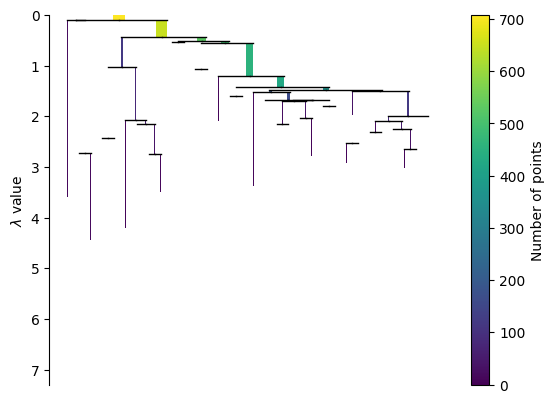

In [42]:
import hdbscan

model = hdbscan.HDBSCAN(min_cluster_size=10)
model.fit(data_2d)
model.labels_.max()

model.condensed_tree_.plot()

In [43]:
fig = go.Figure(
    data=[go.Scatter(x=data_2d[model.labels_ >= 0,0],
                     y=data_2d[model.labels_ >= 0,1],
                     mode='markers',
                     hovertext=dataNoNaN['Nom_Districte'],
                     marker=dict(
                         color=model.labels_[model.labels_ >= 0],
                         size=5,
                         opacity=0.2,
                         colorscale=px.colors.qualitative.Light24
                     ),
                    )],
    layout=dict(title="Nom_Districte",
                width=900,
                height=800,
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                xaxis=dict(
                    linecolor='#cccccc',
                    linewidth=1,
                    zeroline=False,
                    visible=True
                ),
                yaxis=dict(
                    linecolor='#cccccc',
                    linewidth=1,
                    zeroline=False,
                    visible=True
                ),
               ))
fig.show()

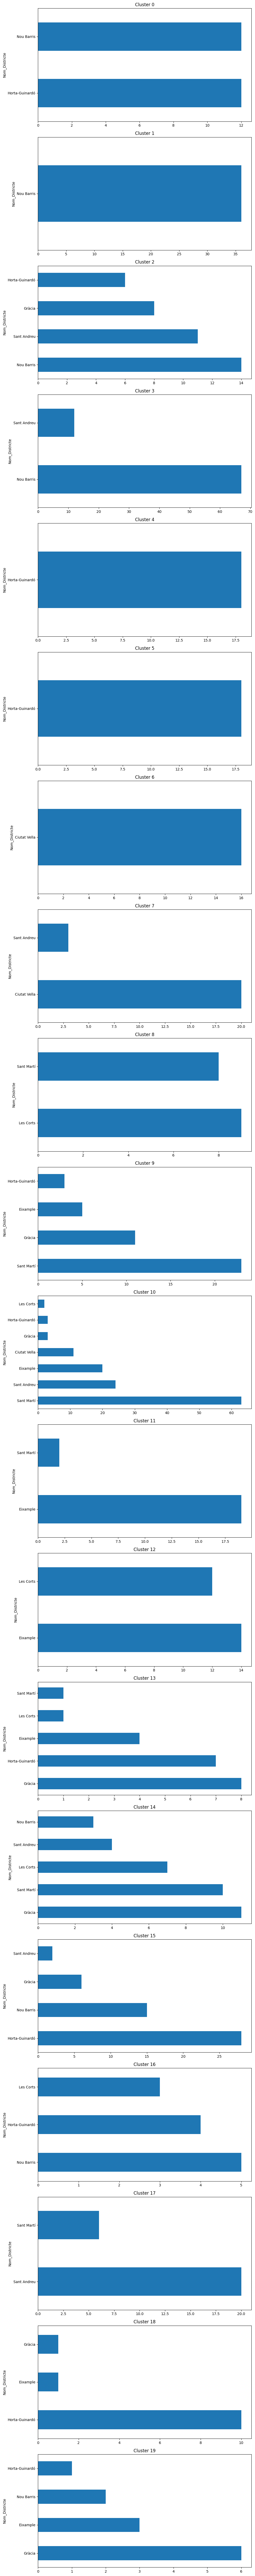

In [45]:
fig, axis = plt.subplots(model.labels_.max() + 1, 1, figsize=(10, 100))
for ax, i in zip(axis.squeeze(), range(model.labels_.max() + 1)):
    dataNoNaN[model.labels_ == i]['Nom_Districte'].value_counts().plot(kind='barh', ax=ax, title=f'Cluster {i}')
plt.tight_layout()

In [50]:

rnd = 0

op2idx = {op : i for i, op in enumerate(dataNoNaN['Nom_Districte'].value_counts().index)}
dists = np.full((len(op2idx), len(op2idx)), 99999.)
for i, op_a in tqdm.tqdm(enumerate(dataNoNaN['Nom_Districte']), total=dataNoNaN.shape[0]):
    for j,  op_b in enumerate(dataNoNaN['Nom_Districte']):
        idx_i = op2idx[op_a]
        idx_j = op2idx[op_b]
        if idx_i == idx_j:
            dists[idx_i, idx_j] = 0.
        elif dists[idx_i, idx_j] > 99998. or rnd == 0:
            #else:
            d = min(dists[idx_j, idx_i], min(dists[idx_i, idx_j], np.linalg.norm(data_2d[i] - data_2d[j])))
            dists[idx_i, idx_j] = d
            dists[idx_j, idx_i] = d

        rnd = (rnd + 1) % 4

fig = px.imshow(dists, color_continuous_scale='RdBu',
                x=sorted(op2idx, key=op2idx.get, reverse=False),
                y=sorted(op2idx, key=op2idx.get, reverse=False),
                width=1900, height=1900)
fig.show()

100%|██████████| 708/708 [00:02<00:00, 330.53it/s]


Tal y como se esperaba, en la gráfica anterior puede observarse como a medida que aumenta el número de clusters se va reduciendo el error. A partir de
k
=
4
, el error se reduce significativamente y no se aprecia una notable reducción del error al aumentar el valor de
k
. Por lo que una decisión razonable es pensar que el número de clusters originales es de 4.

Se puede afinar más con una métrica que no sólo utilice la distancia intra-grupo sino también la inter-grupo. Tal y como aparece en la teoría.

In [ ]:
# Mostrar NaN por filas
for index, row in data.iterrows():
    nan_columns = row[row.isna()].index.tolist()
    if nan_columns:
        print(f"Fila {row['Any']} contiene NaN en columnas: {', '.join(nan_columns)}")

In [ ]:
# Estandarizar las características
scaler = StandardScaler()
features_scaled = scaler.fit_transform(data_imputed_numeric)

In [ ]:
# Aplicar KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features_scaled)

KMeans(n_clusters=3, random_state=42)

In [ ]:
# Obtener las etiquetas de los clusters y agregarlas al DataFrame original
data['Cluster'] = kmeans.labels_

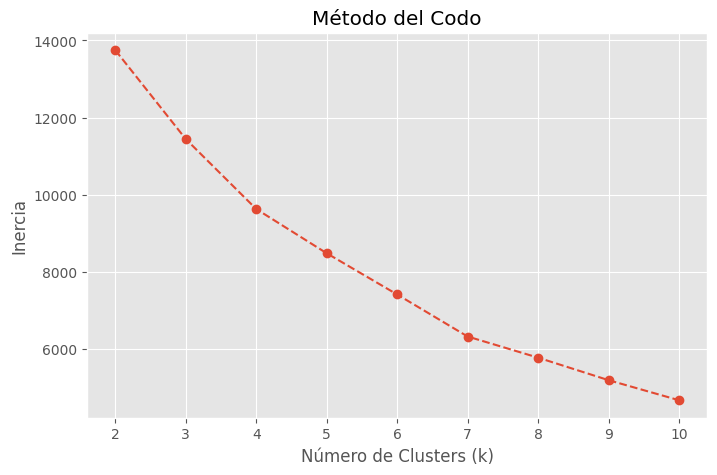

Coeficiente de Silueta: 0.2854992813607934


In [ ]:
# 3. Selección del número óptimo de clusters
# Usar método del codo para encontrar el número óptimo de clusters
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.grid(True)
plt.show()

# 4. Aplicación del algoritmo de clustering
# Basándonos en el método del codo, seleccionamos un número de clusters (k=3)
kmeans_final = KMeans(n_clusters=4, random_state=42)
kmeans_final.fit(features_scaled)

# 5. Evaluación de los resultados
# Coeficiente de Silueta
silhouette_avg = silhouette_score(features_scaled, kmeans_final.labels_)
print("Coeficiente de Silueta:", silhouette_avg)



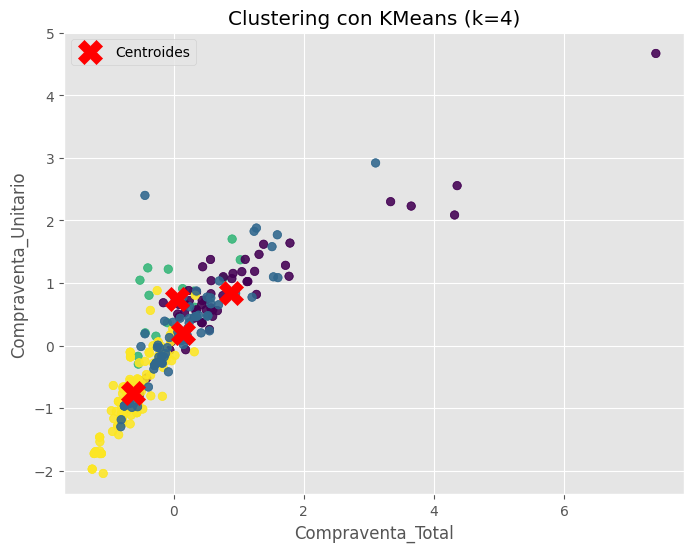

In [ ]:
# 6. Visualización de los clusters
# Visualizar los centroides de los clusters en un gráfico de dispersión 2D
plt.figure(figsize=(8, 6))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=kmeans_final.labels_, cmap='viridis', alpha=0.5)
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroides')
plt.xlabel('Compraventa_Total')
plt.ylabel('Compraventa_Unitario')
plt.title('Clustering con KMeans (k=4)')
plt.legend()
plt.show()

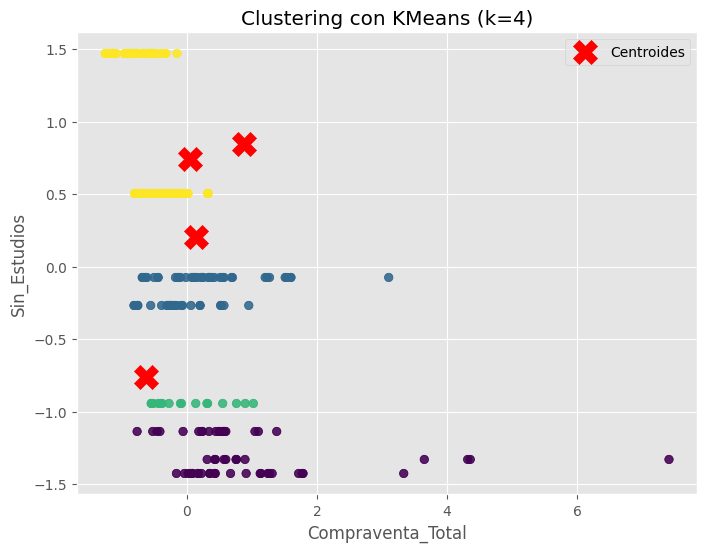

In [ ]:
# 6. Visualización de los clusters
# Visualizar los centroides de los clusters en un gráfico de dispersión 2D
plt.figure(figsize=(8, 6))
plt.scatter(features_scaled[:, 0], features_scaled[:, 4], c=kmeans_final.labels_, cmap='viridis', alpha=0.5)
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroides')
plt.xlabel('Compraventa_Total')
plt.ylabel('Sin_Estudios')
plt.title('Clustering con KMeans (k=4)')
plt.legend()
plt.show()

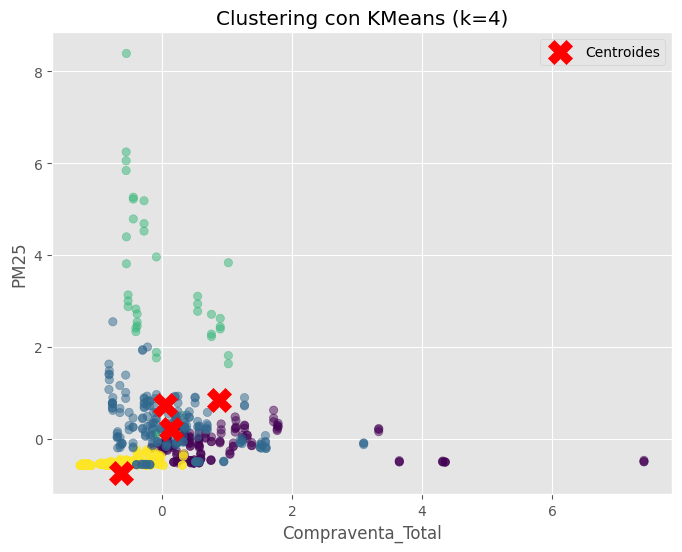

In [ ]:
# 6. Visualización de los clusters
# Visualizar los centroides de los clusters en un gráfico de dispersión 2D
plt.figure(figsize=(8, 6))
plt.scatter(features_scaled[:, 0], features_scaled[:, 9], c=kmeans_final.labels_, cmap='viridis', alpha=0.5)
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroides')
plt.xlabel('Compraventa_Total')
plt.ylabel('PM25')
plt.title('Clustering con KMeans (k=4)')
plt.legend()
plt.show()